In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.tree import DecisionTreeClassifier

Loading the model dataset saved after dataset preprocessing.

In [6]:
data = pd.read_csv('Datasets/model_dataset2008-18.csv')

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5812\3260568331.py:1: DtypeWarning: Columns (3,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Datasets/model_dataset2008-18.csv')


Our Main objectibe is to predict the occurence and size of fire and we use FIRE_SIZE_CLASS as target variable to achieve that. It has values 'A'-'G' (denotes size of fire from .25 acres to 5000+ acre size fire) and 'N' (denotes no fire).

Alternate approches to modellling: Below are the commented codes to run predictive modelling on the dataset using alternate target variable.

In [ ]:
# run the below commented code to only predict the occurence of fire so we update the fire size class as only Y or N:

# data['FIRE_SIZE_CLASS'] = data['FIRE_SIZE_CLASS'].replace(['A', 'B', 'C', 'D', 'E', 'F', 'G'], 'Y')

In [ ]:
# run the below commented code to only predict the size of fire so we update the fire size class as only A-G(no N)

# data = data[data['FIRE_SIZE_CLASS'] != 'N']

In [7]:
# Defining predictor variables and target variable
X = data[['tmin', 'tmax', 'prcp', 'snow', 'wspd', 'pres', 'LATITUDE', 'LONGITUDE', 'month']]
y = data['FIRE_SIZE_CLASS']

# Splitting the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((983476, 9), (245870, 9))

### Logistic regression

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Encoding the target variable (since Logistic Regression doesn't accept string labels)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initializing the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, multi_class='ovr', solver='liblinear')

# Training the model
log_reg.fit(X_train_scaled, y_train_encoded)

# Predicting on the test set
y_logistic_pred = log_reg.predict(X_test_scaled)

In [9]:
# Calculating accuracy
logistic_accuracy = accuracy_score(y_test_encoded, y_logistic_pred)

logistic_f1_score = f1_score(y_test_encoded, y_logistic_pred, average = None)
logistic_f1avg_score = f1_score(y_test_encoded, y_logistic_pred, average = 'macro')
logistic_avg_precision_score = precision_score(y_test_encoded, y_logistic_pred, average = 'macro')
logistic_avg_recall_score = recall_score(y_test_encoded, y_logistic_pred, average = 'macro')
logistic_precision_val = precision_score(y_test_encoded, y_logistic_pred, average=None)
logistic_recall_val = recall_score(y_test_encoded, y_logistic_pred, average=None)

# Generating a classification report
logistic_class_report = classification_report(y_test_encoded, y_logistic_pred)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py

In [10]:
print("Logistic Regression Metrics:")
print("-----------------------------")

# Printing Accuracy
print(f"Accuracy: {logistic_accuracy:.4f}")

# Printing F1-Score for each class
print("\nF1-Score (per class):")
for label, score in zip(data['FIRE_SIZE_CLASS'].unique(), logistic_f1_score):
    print(f"Class {label}: {score:.4f}")

# Printing Precision for each class
print("\nPrecision (per class):")
for label, score in zip(data['FIRE_SIZE_CLASS'].unique(), logistic_precision_val):
    print(f"Class {label}: {score:.4f}")

# Printing Recall for each class
print("\nRecall (per class):")
for label, score in zip(data['FIRE_SIZE_CLASS'].unique(), logistic_recall_val):
    print(f"Class {label}: {score:.4f}")

# Printing Average Metrics
print("\nAverage Metrics:")
print(f"Average F1-Score: {logistic_f1avg_score:.4f}")
print(f"Average Precision: {logistic_avg_precision_score:.4f}")
print(f"Average Recall: {logistic_avg_recall_score:.4f}")

# Printing Classification Report
print("\nClassification Report:")
print(logistic_class_report)


Logistic Regression Metrics:
-----------------------------
Accuracy: 0.5033

F1-Score (per class):
Class N: 0.0017
Class A: 0.0006
Class C: 0.0000
Class E: 0.0000
Class B: 0.0000
Class D: 0.0000
Class F: 0.0016
Class G: 0.6697

Precision (per class):
Class N: 0.2806
Class A: 0.2222
Class C: 0.0000
Class E: 0.0000
Class B: 0.0000
Class D: 0.0000
Class F: 0.0641
Class G: 0.5037

Recall (per class):
Class N: 0.0008
Class A: 0.0003
Class C: 0.0000
Class E: 0.0000
Class B: 0.0000
Class D: 0.0000
Class F: 0.0008
Class G: 0.9992

Average Metrics:
Average F1-Score: 0.0842
Average Precision: 0.1338
Average Recall: 0.1251

Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.00      0.00     46061
           1       0.22      0.00      0.00     40840
           2       0.00      0.00      0.00     13885
           3       0.00      0.00      0.00      4876
           4       0.00      0.00      0.00      4878
           5       0.00      0.

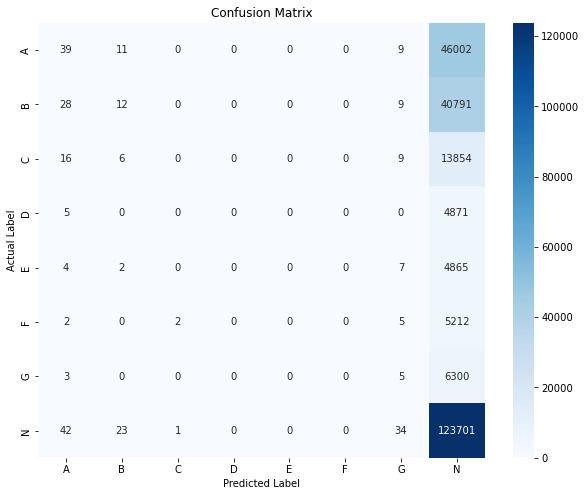

In [14]:
# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_logistic_pred)

# Extracting unique classes from y_train
categories = y_train.unique()

# Sorting the categories for consistent order
categories.sort()

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=categories,
            yticklabels=categories)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

### Decision tree classifier

In [15]:
# Initializing the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Training the classifier
clf.fit(X_train, y_train)

# Predicting on the test set
y_decision_pred = clf.predict(X_test)

In [16]:
# Calculating accuracy
decision_accuracy = accuracy_score(y_test, y_decision_pred)

decision_f1_score = f1_score(y_test, y_decision_pred, average = None)
decision_precision_val = precision_score(y_test, y_decision_pred, average=None)
decision_recall_val = recall_score(y_test, y_decision_pred, average=None)

# Generating a classification report
decision_class_report = classification_report(y_test, y_decision_pred)

avg_decision_f1_score = f1_score(y_test, y_decision_pred, average = 'macro')
decision_avg_precision_val = precision_score(y_test, y_decision_pred, average='macro')
decision_avg_recall_val = recall_score(y_test, y_decision_pred, average='macro')

In [17]:
print("Decision Tree Metrics:")
print("----------------------")

# Printing Accuracy
print(f"Accuracy: {decision_accuracy:.4f}")

# Printing F1-Score for each class
print("\nF1-Score (per class):")
for label, score in zip(data['FIRE_SIZE_CLASS'].unique(), decision_f1_score):
    print(f"Class {label}: {score:.4f}")

# Printing Precision for each class
print("\nPrecision (per class):")
for label, score in zip(data['FIRE_SIZE_CLASS'].unique(), decision_precision_val):
    print(f"Class {label}: {score:.4f}")

# Printing Recall for each class
print("\nRecall (per class):")
for label, score in zip(data['FIRE_SIZE_CLASS'].unique(), decision_recall_val):
    print(f"Class {label}: {score:.4f}")

# Printing Average Metrics
print("\nAverage Metrics:")
print(f"Average F1-Score: {avg_decision_f1_score:.4f}")
print(f"Average Precision: {decision_avg_precision_val:.4f}")
print(f"Average Recall: {decision_avg_recall_val:.4f}")

# Printing Classification Report
print("\nClassification Report:")
print(decision_class_report)


Decision Tree Metrics:
----------------------
Accuracy: 0.5947

F1-Score (per class):
Class N: 0.5037
Class A: 0.4654
Class C: 0.4520
Class E: 0.5704
Class B: 0.6849
Class D: 0.7369
Class F: 0.8187
Class G: 0.6687

Precision (per class):
Class N: 0.5004
Class A: 0.4615
Class C: 0.4438
Class E: 0.5694
Class B: 0.6801
Class D: 0.7393
Class F: 0.8191
Class G: 0.6739

Recall (per class):
Class N: 0.5071
Class A: 0.4692
Class C: 0.4605
Class E: 0.5714
Class B: 0.6898
Class D: 0.7345
Class F: 0.8183
Class G: 0.6637

Average Metrics:
Average F1-Score: 0.6126
Average Precision: 0.6109
Average Recall: 0.6143

Classification Report:
              precision    recall  f1-score   support

           A       0.50      0.51      0.50     46061
           B       0.46      0.47      0.47     40840
           C       0.44      0.46      0.45     13885
           D       0.57      0.57      0.57      4876
           E       0.68      0.69      0.68      4878
           F       0.74      0.73      0.74 

Confusion metrics for decision tree

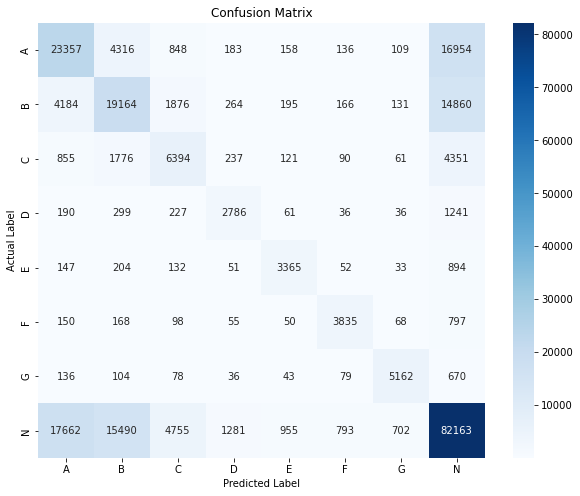

In [20]:
# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_decision_pred)

# Extracting unique classes from y_train
categories = y_train.unique()

# Sorting the categories for consistent order
categories.sort()

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=categories,
            yticklabels=categories)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

### Random Forest

In [21]:
# Initializing the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the classifier
rf_clf.fit(X_train, y_train)

# Predicting on the test set
y_rf_pred = rf_clf.predict(X_test)

In [24]:
rf_avg_f1 = f1_score(y_test, y_rf_pred, average = 'macro')
rf_avgprecision_val = precision_score(y_test, y_rf_pred, average='macro')
rf_avgrecall_val = recall_score(y_test, y_rf_pred, average='macro')

rf_accuracy = accuracy_score(y_test, y_rf_pred)
rf_f1_score = f1_score(y_test, y_rf_pred, average = None)
rf_precision_val = precision_score(y_test, y_rf_pred, average=None)
rf_recall_val = recall_score(y_test, y_rf_pred, average=None)
rf_class_report = classification_report(y_test, y_rf_pred)

In [25]:
print("Random Forest Metrics:")
print("----------------------")

# Printing Accuracy
print(f"Accuracy: {rf_accuracy:.4f}")

# Printing F1-Score for each class
print("\nF1-Score (per class):")
for label, score in zip(data['FIRE_SIZE_CLASS'].unique(), rf_f1_score):
    print(f"Class {label}: {score:.4f}")

# Printing Precision for each class
print("\nPrecision (per class):")
for label, score in zip(data['FIRE_SIZE_CLASS'].unique(), rf_precision_val):
    print(f"Class {label}: {score:.4f}")

# Printing Recall for each class
print("\nRecall (per class):")
for label, score in zip(data['FIRE_SIZE_CLASS'].unique(), rf_recall_val):
    print(f"Class {label}: {score:.4f}")

# Printing Average Metrics
print("\nAverage Metrics:")
print(f"Average F1-Score: {rf_avg_f1:.4f}")
print(f"Average Precision: {rf_avgprecision_val:.4f}")
print(f"Average Recall: {rf_avgrecall_val:.4f}")

# Printing Classification Report
print("\nClassification Report:")
print(rf_class_report)


Random Forest Metrics:
----------------------
Accuracy: 0.5972

F1-Score (per class):
Class N: 0.4653
Class A: 0.4015
Class C: 0.3392
Class E: 0.4306
Class B: 0.5136
Class D: 0.5564
Class F: 0.6879
Class G: 0.7139

Precision (per class):
Class N: 0.5079
Class A: 0.4666
Class C: 0.4531
Class E: 0.5723
Class B: 0.6490
Class D: 0.6683
Class F: 0.7387
Class G: 0.6468

Recall (per class):
Class N: 0.4292
Class A: 0.3524
Class C: 0.2710
Class E: 0.3452
Class B: 0.4250
Class D: 0.4765
Class F: 0.6436
Class G: 0.7965

Average Metrics:
Average F1-Score: 0.5135
Average Precision: 0.5878
Average Recall: 0.4674

Classification Report:
              precision    recall  f1-score   support

           A       0.51      0.43      0.47     46061
           B       0.47      0.35      0.40     40840
           C       0.45      0.27      0.34     13885
           D       0.57      0.35      0.43      4876
           E       0.65      0.42      0.51      4878
           F       0.67      0.48      0.56 

Tuning Random forest model

In [27]:
# Initializing the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Parameters for grid search
param_grid = {
    'n_estimators': [200, 500, 1000],
    'max_depth': [None, 30, 50],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4]
}

# Grid search with 3-fold cross-validation using macro-averaged F1-score as the scoring metric
grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='f1_macro', verbose=2, n_jobs=-1)

# Fitting the model
grid_search.fit(X_train, y_train)

# Best parameters from grid search
best_params = grid_search.best_params_


Fitting 3 folds for each of 36 candidates, totalling 108 fits


KeyboardInterrupt: 

fitting the tuned model.

In [28]:
# Random Forest with tuned hyperparameters
rf_clf2 = RandomForestClassifier(n_estimators=200, 
                                max_depth=30 , 
                                min_samples_split=5, 
                                min_samples_leaf=2, 
                                random_state=42)

rf_clf2.fit(X_train, y_train)

y_rf_pred = rf_clf2.predict(X_test)

In [31]:
rf_avg_f1 = f1_score(y_test, y_rf_pred, average = 'macro')
rf_avgprecision_val = precision_score(y_test, y_rf_pred, average='macro')
rf_avgrecall_val = recall_score(y_test, y_rf_pred, average='macro')

rf_accuracy = accuracy_score(y_test, y_rf_pred)
rf_f1_score = f1_score(y_test, y_rf_pred, average = None)
rf_precision_val = precision_score(y_test, y_rf_pred, average=None)
rf_recall_val = recall_score(y_test, y_rf_pred, average=None)
rf_class_report = classification_report(y_test, y_rf_pred)

In [32]:
print("Random Forest Metrics:")
print("----------------------")

# Printing Accuracy
print(f"Accuracy: {rf_accuracy:.4f}")

# Printing F1-Score for each class
print("\nF1-Score (per class):")
for label, score in zip(data['FIRE_SIZE_CLASS'].unique(), rf_f1_score):
    print(f"Class {label}: {score:.4f}")

# Printing Precision for each class
print("\nPrecision (per class):")
for label, score in zip(data['FIRE_SIZE_CLASS'].unique(), rf_precision_val):
    print(f"Class {label}: {score:.4f}")

# Printing Recall for each class
print("\nRecall (per class):")
for label, score in zip(data['FIRE_SIZE_CLASS'].unique(), rf_recall_val):
    print(f"Class {label}: {score:.4f}")

# Printing Average Metrics
print("\nAverage Metrics:")
print(f"Average F1-Score: {rf_avg_f1:.4f}")
print(f"Average Precision: {rf_avgprecision_val:.4f}")
print(f"Average Recall: {rf_avgrecall_val:.4f}")

# Printing Classification Report
print("\nClassification Report:")
print(rf_class_report)


Random Forest Metrics:
----------------------
Accuracy: 0.6113

F1-Score (per class):
Class N: 0.4551
Class A: 0.3886
Class C: 0.3314
Class E: 0.4324
Class B: 0.5220
Class D: 0.5719
Class F: 0.6929
Class G: 0.7237

Precision (per class):
Class N: 0.5475
Class A: 0.5292
Class C: 0.6119
Class E: 0.7805
Class B: 0.8281
Class D: 0.7917
Class F: 0.7724
Class G: 0.6222

Recall (per class):
Class N: 0.3893
Class A: 0.3070
Class C: 0.2272
Class E: 0.2990
Class B: 0.3811
Class D: 0.4476
Class F: 0.6282
Class G: 0.8648

Average Metrics:
Average F1-Score: 0.5147
Average Precision: 0.6854
Average Recall: 0.4430

Classification Report:
              precision    recall  f1-score   support

           A       0.55      0.39      0.46     46061
           B       0.53      0.31      0.39     40840
           C       0.61      0.23      0.33     13885
           D       0.78      0.30      0.43      4876
           E       0.83      0.38      0.52      4878
           F       0.79      0.45      0.57 

confusion matrix for random forest model.

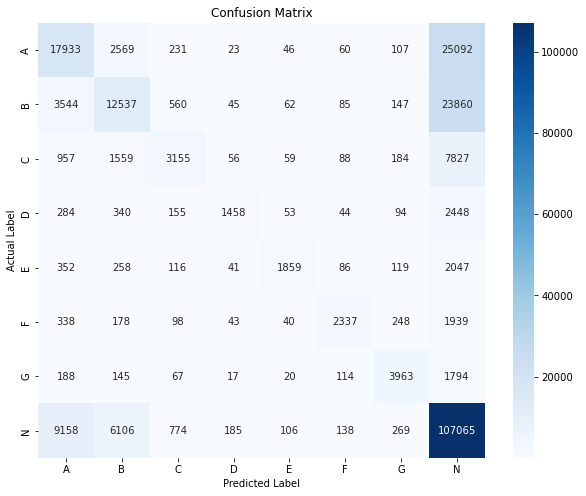

In [33]:
# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_rf_pred)

# Extracting unique classes from y_train
categories = y_train.unique()

# Sorting the categories for consistent order
categories.sort()

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=categories,
            yticklabels=categories)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

### Deep Neural Network

In [34]:
# initial model

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# One-hot encoding the target variable
encoder = OneHotEncoder()
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1)).toarray()
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1)).toarray()

# Model Architecture

# Defining the DNN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(y_train_encoded.shape[1], activation='softmax')  # Number of classes in the output layer
])

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training
history = model.fit(X_train_scaled, y_train_encoded, epochs=15, batch_size=256, validation_split=0.2, verbose=1)

# Evaluation
loss, accuracy = model.evaluate(X_test_scaled, y_test_encoded, verbose=0)

accuracy

Epoch 1/15
3074/3074 [==============================] - 14s 4ms/step - loss: 1.3661 - accuracy: 0.5084 - val_loss: 1.3293 - val_accuracy: 0.5122
Epoch 2/15
3074/3074 [==============================] - 13s 4ms/step - loss: 1.3335 - accuracy: 0.5111 - val_loss: 1.3167 - val_accuracy: 0.5136
Epoch 3/15
3074/3074 [==============================] - 13s 4ms/step - loss: 1.3254 - accuracy: 0.5117 - val_loss: 1.3121 - val_accuracy: 0.5141
Epoch 4/15
3074/3074 [==============================] - 13s 4ms/step - loss: 1.3214 - accuracy: 0.5121 - val_loss: 1.3087 - val_accuracy: 0.5144
Epoch 5/15
3074/3074 [==============================] - 15s 5ms/step - loss: 1.3177 - accuracy: 0.5121 - val_loss: 1.3053 - val_accuracy: 0.5143
Epoch 6/15
3074/3074 [==============================] - 15s 5ms/step - loss: 1.3153 - accuracy: 0.5125 - val_loss: 1.3023 - val_accuracy: 0.5145
Epoch 7/15
3074/3074 [==============================] - 14s 4ms/step - loss: 1.3134 - accuracy: 0.5125 - val_loss: 1.3017 - val_ac

0.5156586766242981

In [35]:
# Predicting on the test set using the trained DNN model
y_pred_probs = model.predict(X_test_scaled)
y_DNN_pred = y_pred_probs.argmax(axis=1)  # Getting the class with highest probability

# Since y_test_encoded is one-hot encoded, we need to revert it to its original form
y_true = y_test_encoded.argmax(axis=1)

7684/7684 [==============================] - 10s 1ms/step


In [36]:
DNN_accuracy_score = accuracy_score(y_true, y_DNN_pred)
DNN_f1avg_val = f1_score(y_true, y_DNN_pred, average='macro')
DNN_precisionavg_val = precision_score(y_true, y_DNN_pred,  average='macro')
DNN_recallavg_val = recall_score(y_true, y_DNN_pred,  average='macro')

DNN_f1_score = f1_score(y_true, y_DNN_pred, average = None)
DNN_precision_val = precision_score(y_true, y_DNN_pred, average=None)
DNN_recall_val = recall_score(y_true, y_DNN_pred, average=None)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
print("Deep Neural Network Metrics:")
print("----------------------------")

# Printing Accuracy
print(f"Accuracy: {DNN_accuracy_score:.4f}")

# Printing F1-Score for each class
print("\nF1-Score (per class):")
for label, score in zip(data['FIRE_SIZE_CLASS'].unique(), DNN_f1_score):
    print(f"Class {label}: {score:.4f}")

# Printing Precision for each class
print("\nPrecision (per class):")
for label, score in zip(data['FIRE_SIZE_CLASS'].unique(), DNN_precision_val):
    print(f"Class {label}: {score:.4f}")

# Printing Recall for each class
print("\nRecall (per class):")
for label, score in zip(data['FIRE_SIZE_CLASS'].unique(), DNN_recall_val):
    print(f"Class {label}: {score:.4f}")

# Printing Average Metrics
print("\nAverage Metrics:")
print(f"Average F1-Score: {DNN_f1avg_val:.4f}")
print(f"Average Precision: {DNN_precisionavg_val:.4f}")
print(f"Average Recall: {DNN_recallavg_val:.4f}")


Deep Neural Network Metrics:
----------------------------
Accuracy: 0.5157

F1-Score (per class):
Class N: 0.1215
Class A: 0.0407
Class C: 0.0000
Class E: 0.0000
Class B: 0.0000
Class D: 0.0130
Class F: 0.2920
Class G: 0.6869

Precision (per class):
Class N: 0.3453
Class A: 0.2838
Class C: 0.0000
Class E: 0.0000
Class B: 0.0000
Class D: 0.2096
Class F: 0.3459
Class G: 0.5299

Recall (per class):
Class N: 0.0738
Class A: 0.0219
Class C: 0.0000
Class E: 0.0000
Class B: 0.0000
Class D: 0.0067
Class F: 0.2527
Class G: 0.9763

Average Metrics:
Average F1-Score: 0.1443
Average Precision: 0.2143
Average Recall: 0.1664


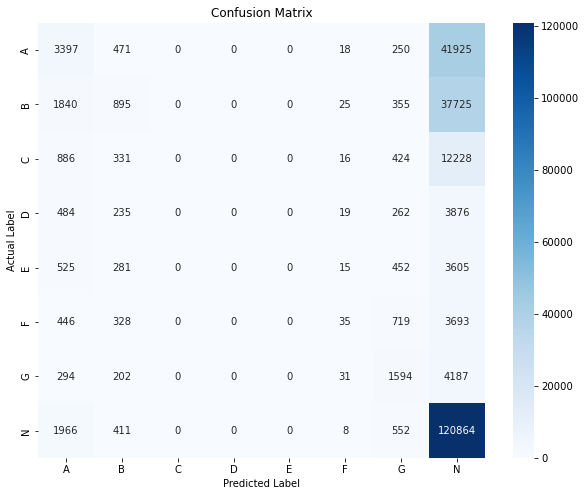

In [38]:
# Generating the confusion matrix
conf_matrix = confusion_matrix(y_true, y_DNN_pred)

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=encoder.categories_[0],
            yticklabels=encoder.categories_[0])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

we see that the DNN model preformance is very low compared to the random forest model. so we just check a more complex DNN with 256 neurons.

In [39]:
# Data Preprocessing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

encoder = OneHotEncoder()
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1)).toarray()
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1)).toarray()

# DNN Model with tuned hyperparameters
model2 = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_train_encoded.shape[1], activation='softmax')
])

model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history2 = model2.fit(X_train_scaled, y_train_encoded, 
                    epochs=15, 
                    batch_size=512, 
                    validation_split=0.2, 
                    verbose=1)

# Evaluation
loss, accuracy = model2.evaluate(X_test_scaled, y_test_encoded, verbose=0)

accuracy

Epoch 1/15
1537/1537 [==============================] - 19s 11ms/step - loss: 1.3752 - accuracy: 0.5067 - val_loss: 1.3298 - val_accuracy: 0.5127
Epoch 2/15
1537/1537 [==============================] - 19s 12ms/step - loss: 1.3364 - accuracy: 0.5109 - val_loss: 1.3158 - val_accuracy: 0.5130
Epoch 3/15
1537/1537 [==============================] - 18s 12ms/step - loss: 1.3278 - accuracy: 0.5115 - val_loss: 1.3108 - val_accuracy: 0.5137
Epoch 4/15
1537/1537 [==============================] - 17s 11ms/step - loss: 1.3227 - accuracy: 0.5116 - val_loss: 1.3075 - val_accuracy: 0.5137
Epoch 5/15
1537/1537 [==============================] - 17s 11ms/step - loss: 1.3191 - accuracy: 0.5122 - val_loss: 1.3020 - val_accuracy: 0.5139
Epoch 6/15
1537/1537 [==============================] - 17s 11ms/step - loss: 1.3161 - accuracy: 0.5123 - val_loss: 1.3005 - val_accuracy: 0.5146
Epoch 7/15
1537/1537 [==============================] - 17s 11ms/step - loss: 1.3132 - accuracy: 0.5124 - val_loss: 1.2965 -

0.5161671042442322

Since we do not see any significant inprovement in the accuracy we chose the first model for comparing with other models.

## Model Comparison

Comparing all the different models

Comparing average metrics of each model using a radar chart

{'Decision Tree': [0.5947289217879367,
  0.612589213080526,
  0.6109311415623622,
  0.6143203184930577],
 'Logistic Regression': [0.5033432301622809,
  0.08419833482667208,
  0.13382213698413734,
  0.12514067865085557],
 'Random Forest': [0.6113271240899663,
  0.5147326373671879,
  array([0.54750565, 0.52916596, 0.61190846, 0.78051392, 0.82806236,
         0.79166667, 0.77236406, 0.62221047]),
  array([0.38933154, 0.30697845, 0.22722362, 0.29901559, 0.38109881,
         0.4476154 , 0.62824984, 0.86481531])],
 'Neural Network': [0.515658681417009,
  0.14427285229943773,
  0.21430340944401968,
  0.16641749341320514]}

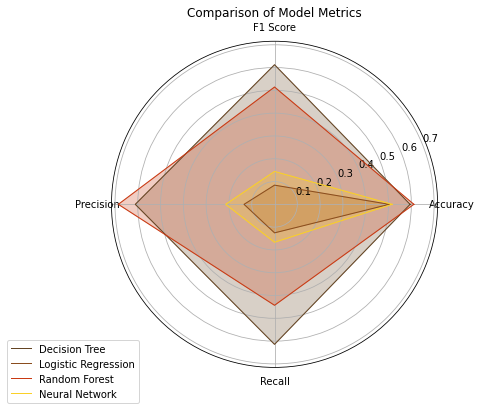

In [43]:
classes = ['Accuracy', 'F1 Score', 'Precision', 'Recall']
model_names = ['Decision Tree', 'Logistic Regression', 'Random Forest', 'Neural Network']
metrics = {
    'Decision Tree': [decision_accuracy, avg_decision_f1_score, decision_avg_precision_val, decision_avg_recall_val],
    'Logistic Regression': [logistic_accuracy, logistic_f1avg_score, logistic_avg_precision_score, logistic_avg_recall_score],
    'Random Forest': [rf_accuracy, rf_avg_f1 , rf_avgprecision_val ,rf_avgrecall_val],
    'Neural Network': [DNN_accuracy_score, DNN_f1avg_val ,DNN_precisionavg_val ,DNN_recallavg_val]
}

colors = [
     "#644423", 
    "#8A4D1E",  "#C93912",  "#FAD028"
]

# Create a radar chart for comparison of all models
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'polar': True})

for idx, model_name in enumerate(model_names):
    values = metrics[model_name]
    angles = np.linspace(0, 2 * np.pi, len(classes), endpoint=False)
    angles = np.concatenate((angles, [angles[0]]))  # Close the plot
    values = np.concatenate((values, [values[0]]))  # Close the plot

    ax.plot(angles, values, linewidth=1, linestyle='solid', label=model_name, color=colors[idx])
    ax.fill(angles, values, color=colors[idx], alpha=0.25)

ax.set_xticks(angles[:-1])  # Set the tick angles (excluding the last angle)
ax.set_xticklabels(classes)  # Set the class labels
ax.set_title("Comparison of Model Metrics")
ax.grid(True)
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.savefig('Plots/model.png',dpi = 500, transparent = True)

plt.show()


Comparing classwise F1-score of each model

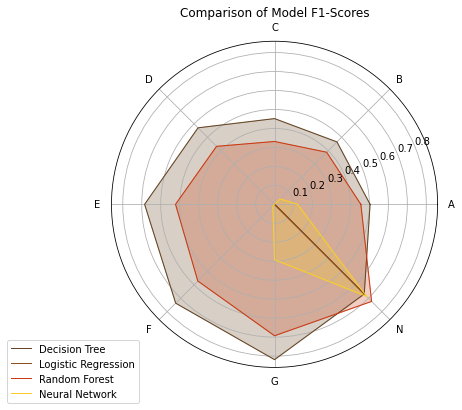

In [44]:
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'N']
model_names = ['Decision Tree', 'Logistic Regression', 'Random Forest', 'Neural Network']
metrics = {
    'Decision Tree': decision_f1_score,
    'Logistic Regression': logistic_f1_score,
    'Random Forest': rf_f1_score,
    'Neural Network': DNN_f1_score
}

# Warm color palette from yellow to light red
colors = [
     "#644423", 
    "#8A4D1E",  "#C93912",  "#FAD028"
]

# Create a radar chart for comparison of all models
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'polar': True})

for idx, model_name in enumerate(model_names):
    values = metrics[model_name]
    angles = np.linspace(0, 2 * np.pi, len(classes), endpoint=False)
    angles = np.concatenate((angles, [angles[0]]))  # Close the plot
    values = np.concatenate((values, [values[0]]))  # Close the plot

    ax.plot(angles, values, linewidth=1, linestyle='solid', label=model_name, color=colors[idx])
    ax.fill(angles, values, color=colors[idx], alpha=0.25)

ax.set_xticks(angles[:-1])  # Set the tick angles (excluding the last angle)
ax.set_xticklabels(classes)  # Set the class labels
ax.set_title("Comparison of Model F1-Scores")
ax.grid(True)
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.savefig('Plots/Model_comparison_F1Scores_Classwise.png',dpi = 500, transparent = True)
plt.show()

Comparing classwise Precision of each model

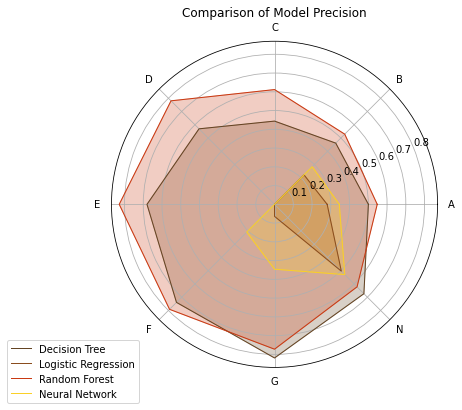

In [45]:

metrics = {
    'Decision Tree': decision_precision_val,
    'Logistic Regression': logistic_precision_val,
    'Random Forest': rf_precision_val,
    'Neural Network': DNN_precision_val
}

# Create a radar chart for comparison of all models
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'polar': True})

for idx, model_name in enumerate(model_names):
    values = metrics[model_name]
    angles = np.linspace(0, 2 * np.pi, len(classes), endpoint=False)
    angles = np.concatenate((angles, [angles[0]]))  # Close the plot
    values = np.concatenate((values, [values[0]]))  # Close the plot

    ax.plot(angles, values, linewidth=1, linestyle='solid', label=model_name, color=colors[idx])
    ax.fill(angles, values, color=colors[idx], alpha=0.25)

ax.set_xticks(angles[:-1])  # Set the tick angles (excluding the last angle)
ax.set_xticklabels(classes)  # Set the class labels
ax.set_title("Comparison of Model Precision")
ax.grid(True)
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()

Comparing classwise Recall of each model

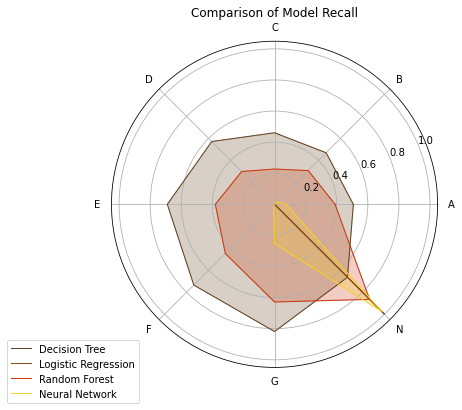

In [46]:
metrics = {
    'Decision Tree': decision_recall_val,
    'Logistic Regression': logistic_recall_val,
    'Random Forest': rf_recall_val,
    'Neural Network': DNN_recall_val
}

# Create a radar chart for comparison of all models
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'polar': True})

for idx, model_name in enumerate(model_names):
    values = metrics[model_name]
    angles = np.linspace(0, 2 * np.pi, len(classes), endpoint=False)
    angles = np.concatenate((angles, [angles[0]]))  # Close the plot
    values = np.concatenate((values, [values[0]]))  # Close the plot

    ax.plot(angles, values, linewidth=1, linestyle='solid', label=model_name, color=colors[idx])
    ax.fill(angles, values, color=colors[idx], alpha=0.25)

ax.set_xticks(angles[:-1])  # Set the tick angles (excluding the last angle)
ax.set_xticklabels(classes)  # Set the class labels
ax.set_title("Comparison of Model Recall")
ax.grid(True)
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()